In [259]:
import sys
# setting path
sys.path.append('..')

In [260]:
import numpy as np

from src import io, var, utils, fourier, lin_reg, reconstruction
from vis import plotter

import importlib
importlib.reload(io)
importlib.reload(var)
importlib.reload(utils)
importlib.reload(fourier)
importlib.reload(lin_reg)
importlib.reload(reconstruction)

importlib.reload(plotter)

<module 'vis.plotter' from '/home/ray/git-projects/spec_appx/notebooks/../vis/plotter.py'>

In [20]:
grid = var.grid()
cell = var.topo_cell()
    
reader = inout.ncdata()
fn = '../data/icon_grid_0012_R02B04_G_linked.nc'
reader.read_dat(fn, grid)
grid.apply_f(utils.rad2deg)

lat_ref = 43
lon_ref = 42
vid = utils.pick_cell(lat_ref, lon_ref, grid)

lat_v = grid.clat_vertices[vid,:]
lon_v = grid.clon_vertices[vid,:]

Nx, Ny = 480, 480

cell.lat = np.linspace(lat_v.min(), lat_v.max(), Nx)
cell.lon = np.linspace(lon_v.min(), lon_v.max(), Ny)

cell.gen_mgrids()
cell.topo = np.cos(cell.lon_grid)

# define triangle given the vertices
triangle = utils.triangle(lon_v, lat_v)
cell.get_masked(triangle)

In [225]:
grid = var.grid()
cell = var.topo_cell()

vid = utils.isoceles(grid, cell)

lat_v = grid.clat_vertices[vid,:]
lon_v = grid.clon_vertices[vid,:]

cell.gen_mgrids()
cell.topo = np.sin( -3.0 * cell.lat_grid + 1.0 * cell.lon_grid)

# define triangle given the vertices
triangle = utils.triangle(lon_v, lat_v)
cell.get_masked(triangle)

In [263]:
def get_opt_alpha(fobj, cell, rng, verbose=True):
    errs = np.zeros_like(rng)
    
    for ii, lmbda in enumerate(rng):
        lmbda = np.around(lmbda, 2)
        a_m, data_recons = lin_reg.do(fobj, cell, lmbda = lmbda)

        fobj.get_freq_grid(a_m)
        freqs = 2.0 * np.abs(fobj.ampls)
        max_frq = freqs.max()

        if verbose: print(ii, lmbda, max_frq, freqs.sum())

        errs[ii] = np.abs(max_frq - 1.0)
            
    if verbose: print("")
    return errs, [data_recons, freqs]

In [227]:
nhi = 12
nhj = 12

fobj = fourier.f_trans(nhi,nhj)
fobj.do_full(cell)

cl_range = np.arange(1,11) / 10.0
cl_errs, _ = get_opt_alpha(cl_range)
    
print("")

min_cl = cl_range[np.argmin(cl_errs)]
min_err_cl = cl_errs[np.argmin(cl_errs)]

fl_range = np.linspace(min_cl-0.09, min_cl+0.09, 19)
fl_errs, _ = get_opt_alpha(fl_range)

print("")

min_fl = fl_range[np.argmin(fl_errs)]
min_err_fl = fl_errs[np.argmin(fl_errs)]

##### !!! REDO RECONS FOR OPTIMAL ALPHA

err_opt, data_recons = get_opt_alpha([min_fl])

dat_2D = reconstruction.recon_2D(data_recons, cell)
err_dat = np.linalg.norm(dat_2D - cell.topo)

print(err_dat)

0 0.1 1.1033513607316485
1 0.2 1.0227965683755802
2 0.3 0.9618963637041497
3 0.4 0.9110790468111511
4 0.5 0.8669439424938221
5 0.6 0.8277778844374757
6 0.7 0.7925457327545375
7 0.8 0.7605491813051746
8 0.9 0.7312820666326296
9 1.0 0.7043589826642456

0 0.11 1.0937266442676974
1 0.12 1.0845776241568326
2 0.13 1.0758385579261664
3 0.14 1.0674575184533677
4 0.15 1.0593927217250738
5 0.16 1.0516100066683354
6 0.17 1.0440810567681191
7 0.18 1.0367821148120049
8 0.19 1.029693034586793
9 0.2 1.0227965683755802
10 0.21 1.0160778229633265
11 0.22 1.0095238383177287
12 0.23 1.0031232570688138
13 0.24 0.99686606220002
14 0.25 0.990743366674979
15 0.26 0.9847472430928544
16 0.27 0.9788705845401587
17 0.28 0.97310699000474
18 0.29 0.9674506693109325


0 0.23 1.0031232570688138
243.00825804540688


(kn,ln) =  0 -5
(kn,ln) =  1 -5
0 0.1 1.3498260094720576 6.0710821060114855
1 0.2 1.2206551038322473 5.6345820280839005
2 0.3 1.1273351324906895 5.286906351588716
3 0.4 1.0527789467071087 4.999711311662063
4 0.5 0.9903600734362699 4.749782774205191
5 0.6 0.9366318477402943 4.52795516188766
6 0.7 0.8895164614837171 4.328658147903823
7 0.8 0.8476406939601504 4.148016910040574
8 0.9 0.8100378257672185 3.98315913711454
9 1.0 0.7759953167867583 3.8318667048788475

0 0.41 1.0460635341393991 4.973238003408649
1 0.42 1.0394630037504387 4.947118943639082
2 0.43 1.0329733760865858 4.921343664309508
3 0.44 1.0265908963784076 4.89590234050511
4 0.45 1.0203120169298792 4.870785720827379
5 0.46 1.0141333812540105 4.845985068369142
6 0.47 1.0080518097468403 4.821492110414466
7 0.48 1.0020642867206322 4.797298995319735
8 0.49 0.9961679486413978 4.7733982553150724
9 0.5 0.9903600734362699 4.749782774205191
10 0.51 0.9846380707538677 4.726445759144809
11 0.52 0.9789994730754845 4.703380715823066
12 0.53

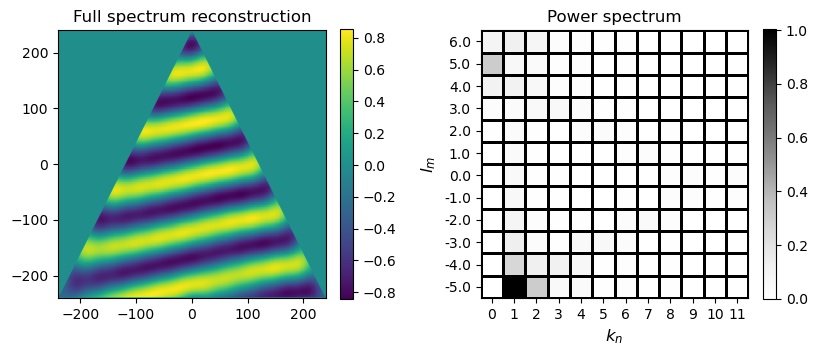

(kn,ln) =  2 -5
0 0.1 1.3657899362636858 5.921497494694258
1 0.2 1.233494936978958 5.549822064960951
2 0.3 1.1389311873314905 5.223407797974449
3 0.4 1.063465999870813 4.941488876199374
4 0.5 1.0002398506351553 4.6922734596955475
5 0.6 0.945768369966488 4.469651984452435
6 0.7 0.8979688893335785 4.269150354532694
7 0.8 0.8554670340636794 4.087458606530845
8 0.9 0.8172938048245032 3.9219532799503622
9 1.0 0.7827331242336834 3.770144009754717

0 0.41 1.0566664739489242 4.915214254111173
1 0.42 1.0499826805832921 4.889257071377543
2 0.43 1.043410591333344 4.863610670557897
3 0.44 1.0369464108589197 4.838268627317187
4 0.45 1.0305865579675875 4.81322473181154
5 0.46 1.0243276486153334 4.788472973755227
6 0.47 1.0181664806199326 4.7640075301673015
7 0.48 1.012100019880481 4.739822755081882
8 0.49 1.006125387925352 4.715913170711106
9 0.5 1.0002398506351553 4.6922734596955475
10 0.51 0.9944408080075468 4.668898458182062
11 0.52 0.9887257848484657 4.645783149543194
12 0.53 0.9830924222889671 

KeyboardInterrupt: 

In [264]:
nhi = 12
nhj = 12

#### initialise solution arrays

coarse_lmbdas = np.zeros((nhi,nhj,len(cl_range)))
fine_lmbdas = np.zeros((nhi,nhj,len(fl_range)))

coarse_lmbdas_errs = np.zeros_like(coarse_lmbdas)
fine_lmbdas_errs = np.zeros_like(fine_lmbdas)

min_cls, min_fls = np.zeros((nhi,nhj)), np.zeros((nhi,nhj))
min_errs_cl, min_errs_fl = np.zeros((nhi,nhj)), np.zeros((nhi,nhj))

dat_errs, opt_lmbdas = np.zeros((nhi,nhj)), np.zeros((nhi,nhj))
opt_errs = np.zeros((nhi,nhj))


#### initialise triangle

grid = var.grid()
cell = var.topo_cell()

vid = utils.isoceles(grid, cell)

lat_v = grid.clat_vertices[vid,:]
lon_v = grid.clon_vertices[vid,:]

cell.gen_mgrids()

# define triangle given the vertices
triangle = utils.triangle(lon_v, lat_v)

mask = triangle.vec_get_mask(cell.lon_grid.ravel(), cell.lat_grid.ravel())
mask = mask.reshape(cell.lon_grid.shape)

#### for each wavenumber pair...

for li,ln in enumerate(ll):
    for ki,kn in enumerate(kk):
        print("(kn,ln) = ", kn, ln)
        
        if ((kn == 0) and (ln < 0)):
            continue
        
        #### generate reference solution in the triangle
        cell.topo = np.sin( kn * cell.lon_grid + ln * cell.lat_grid)
        triangle = utils.triangle(lon_v, lat_v)
        cell.get_masked(triangle, mask = mask)
        
        fobj = fourier.f_trans(nhi,nhj)
        fobj.do_full(cell)
        
        
        #### search for optimal coarse lambdas
        cl_range = np.arange(1,11) / 10.0
        cl_errs, _ = get_opt_alpha(fobj, cell, cl_range)
        
        coarse_lmbdas[li,ki,...] = cl_range
        coarse_lmbdas_errs[li,ki,...] = cl_errs

        min_cl = cl_range[np.argmin(cl_errs)]
        min_err_cl = cl_errs[np.argmin(cl_errs)]
        
        min_cls[li,ki] = min_cl
        min_errs_cl[li,ki] = min_err_cl

        
        #### search for optimal fine lambdas
        fl_range = np.linspace(min_cl-0.09, min_cl+0.09, 19)
        fl_errs, _ = get_opt_alpha(fobj, cell, fl_range)
        
        fine_lmbdas[li,ki,...] = fl_range
        fine_lmbdas_errs[li,ki,...] = fl_errs

        min_fl = fl_range[np.argmin(fl_errs)]
        min_err_fl = fl_errs[np.argmin(fl_errs)]
        
        min_fls[li,ki] = min_fl
        min_errs_fl[li,ki] = min_err_fl

        
        ##### redo recons with the optimal lambda found
        err_opt, data = get_opt_alpha(fobj, cell, [min_fl])
        data_recons, data_freqs = data

        dat_2D = reconstruction.recon_2D(data_recons, cell)
        err_dat = np.linalg.norm(dat_2D - cell.topo)
        
        opt_errs[li,ki] = err_opt
        opt_lmbdas[li,ki] = min_fl
        dat_errs[li,ki] = err_dat
        
        fs = (10,5)
        fig, axs = plt.subplots(1,2, figsize=fs)
        fig_obj = plotter.fig_obj(fig, nhi, nhj)
        axs[0] = fig_obj.phys_panel(axs[0], dat_2D)
        axs[1] = fig_obj.freq_panel(axs[1], data_freqs)
        plt.show()

        
#### transpose output
# coarse_lmbdas = np.transpose(coarse_lmbdas,axes=(1,0,2))
# fine_lmbdas = np.transpose(fine_lmbdas,axes=(1,0,2))

# coarse_lmbdas_errs = np.transpose(coarse_lmbdas_errs,axes=(1,0,2))
# fine_lmbdas_errs = np.transpose(fine_lmbdas_errs,axes=(1,0,2))

# min_cls = min_cls.T
# min_fls = min_fls.T

# min_errs_cl = min_errs_cl.T
# min_errs_fl = min_errs_fl.T

# dat_errs = dat_errs.T
# opt_lmbdas = opt_lmbdas.T
# opt_errs = opt_errs.T

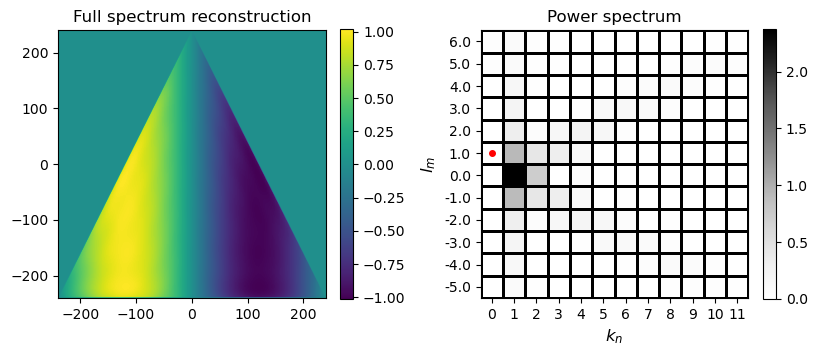

In [242]:
cell.gen_mgrids()
cell.topo = np.sin( 0.0 * cell.lat_grid + 1.0 * cell.lon_grid)

# define triangle given the vertices
triangle = utils.triangle(lon_v, lat_v)
cell.get_masked(triangle)

fobj = fourier.f_trans(nhi,nhj)
fobj.do_full(cell)

a_m, data_recons = lin_reg.do(fobj, cell)

fobj.get_freq_grid(a_m)
freqs = 2.0 * np.abs(fobj.ampls)

dat_2D = reconstruction.recon_2D(data_recons, cell)

coarse_lmbdas = np.zeros((nhi,nhj,len(cl_range)))
# coarse_lmbdas = np.zeros((nhi*nhj,len(cl_range)))
# fine_lmbdas = np.zeros_like((nhi,nhj,len(fl_range)))

coarse_lmbdas_errs = np.zeros_like(coarse_lmbdas)
fine_lmbdas_errs = np.zeros_like(fine_lmbdas)

cnt = 0
for li,ln in enumerate(ll):
    cnt += 1
    for ki,kn in enumerate(kk):
        # print(kn,ln)
        if ((kn == 0) and (ln < 0)):
            coarse_lmbdas[li,ki,...] = 0.0
            # coarse_lmbdas[cnt,...] = 0.0

        coarse_lmbdas[li,ki,...] = cnt #10.0#np.abs(kn)+np.abs(ln)
        # coarse_lmbdas[cnt,...] = kn+ln
        
        
        
# coarse_lmbdas = coarse_lmbdas.reshape(nhi,nhj,len(cl_range))
coarse_lmbdas = np.transpose(coarse_lmbdas,axes=(1,0,2))
projected = np.zeros((nhi,nhj))

for li,ln in enumerate(ll):
    for ki,kn in enumerate(kk):
        if ((kn == 0) and (ln < 0)):
            continue
            
        projected[li,ki] = coarse_lmbdas[li,ki,0]
        
projected = projected.reshape(nhi,nhj)

fs = (10,5)
fig, axs = plt.subplots(1,2, figsize=fs)
fig_obj = plotter.fig_obj(fig, nhi, nhj)
axs[0] = fig_obj.phys_panel(axs[0], dat_2D)
axs[1] = fig_obj.freq_panel(axs[1], freqs)
plt.show()

In [158]:
print(min_cl, min_fl)

0.7 0.72


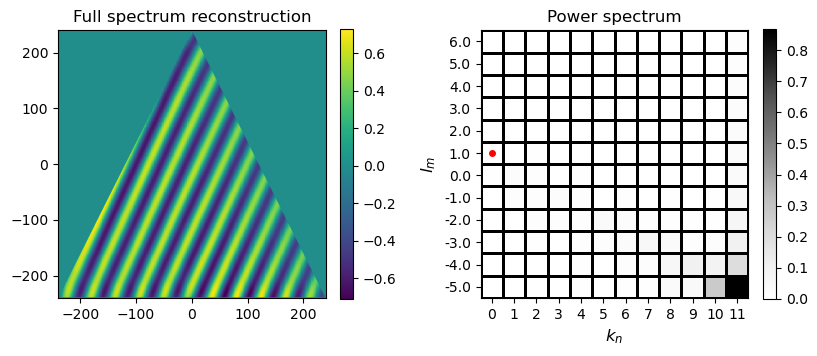

In [134]:
import matplotlib.pyplot as plt

fs = (10,5)
fig, axs = plt.subplots(1,2, figsize=fs)
fig_obj = plotter.fig_obj(fig, nhi, nhj)
axs[0] = fig_obj.phys_panel(axs[0], dat_2D)
axs[1] = fig_obj.freq_panel(axs[1], fobj.ampls)

In [99]:
np.arange(1,21) / 100

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [166]:

ll = np.arange(-5,7)
kk = np.arange(0,12)

for kn in kk:
    for ln in ll:
        if ((kn == 0) and (ln < 0)):
            continue
        
        func = np.sin( kn * cell.lat_grid + ln * cell.lon_grid)
        print(kn, ln)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 -5
1 -4
1 -3
1 -2
1 -1
1 0
1 1
1 2
1 3
1 4
1 5
1 6
2 -5
2 -4
2 -3
2 -2
2 -1
2 0
2 1
2 2
2 3
2 4
2 5
2 6
3 -5
3 -4
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3
3 4
3 5
3 6
4 -5
4 -4
4 -3
4 -2
4 -1
4 0
4 1
4 2
4 3
4 4
4 5
4 6
5 -5
5 -4
5 -3
5 -2
5 -1
5 0
5 1
5 2
5 3
5 4
5 5
5 6
6 -5
6 -4
6 -3
6 -2
6 -1
6 0
6 1
6 2
6 3
6 4
6 5
6 6
7 -5
7 -4
7 -3
7 -2
7 -1
7 0
7 1
7 2
7 3
7 4
7 5
7 6
8 -5
8 -4
8 -3
8 -2
8 -1
8 0
8 1
8 2
8 3
8 4
8 5
8 6
9 -5
9 -4
9 -3
9 -2
9 -1
9 0
9 1
9 2
9 3
9 4
9 5
9 6
10 -5
10 -4
10 -3
10 -2
10 -1
10 0
10 1
10 2
10 3
10 4
10 5
10 6
11 -5
11 -4
11 -3
11 -2
11 -1
11 0
11 1
11 2
11 3
11 4
11 5
11 6
